In [42]:
#%matplotlib notebook
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunc

# if False:
!ping -c 1 192.168.10.16
if True:
    import clicfast2023.clicfast2023 as clicfast2023
    dut = clicfast2023.Clicfast2023()
    dut.init()
    en_comp = np.copy(dut.PixelConf['en_comp'])
    tdac = np.copy(dut.PixelConf['tdac'])

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
64 bytes from 192.168.10.16: icmp_seq=1 ttl=64 time=0.089 ms

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.089/0.089/0.089/0.000 ms


2024-06-27 17:39:08,351 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing spi_inj (firmware version: 2), module basil.HL.spi, base_addr 0x10
2024-06-27 17:39:08,352 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing inj (firmware version: 1), module clicfast2023.pulse_gen_delay, base_addr 0x100
2024-06-27 17:39:08,353 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing sync (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x140
2024-06-27 17:39:08,353 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gate (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x180
2024-06-27 17:39:08,353 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing ts_inj (firmware version: 2), module basil.HL.timestamp, base_addr 0x1c0
2024-06-27 17:39:08,354 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x

In [43]:
col = 3
comp = 1
dut.set_sync()
dut.set_inj(inj_n=0, inj_delay=1024*8, inj_width=1024*8, ext=True)
#dut.set_triginj(inj_n=0, inj_delay=1024*8, inj_width=1024*8, ext=True)
dut.set_inj_amp(0.5, unit="V")

dut.set_en_ampout([]) ##
dut.set_en_inj([col])
dut.set_en_hitbus([]) ## no hit bus (cannot be off by IPFoll)

dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] =0
en_comp[col, :] =1  ## enable all comp
dut.set_en_comp(en_comp)

2024-06-27 17:39:11,921 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-06-27 17:39:11,923 - root - [INFO    ] (MainThread) set_inj: inj_width=8192 inj_delay=8192 inj_n=0 ext=1
2024-06-27 17:39:11,924 - root - [INFO    ] (MainThread) inj_amp: 2651
2024-06-27 17:39:11,929 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000000
2024-06-27 17:39:11,934 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000008
2024-06-27 17:39:11,939 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1fffffff
2024-06-27 17:39:11,949 - root - [INFO    ] (MainThread) set_ram row0 en_comp[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7] wr_0,111,00001_0,111,00000_0,111,00000_1,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00000_0,111,00

In [48]:
dut.set_conf(VDACTh=0x60,
             VDACBL=0x88,
             BLResP=1,
             IPBigFine=19,
             IPSmallFine=7,
             IPFoll=0,        # Ampout OFF
             NFB2=30,         # FB of 2nd amp
             PFB1=30,         # FB of 1st amp
             VP1=20, VP1_2=0, # main current for 1st amp
             VP2=20,          # main current for 2nd amp
             IPDAC=0)
dut.set_inj(inj_n=10, inj_delay=1024*8, inj_width=1024*8, ext=True)
dut.set_triginj(inj_n=1, inj_delay=1024*8, inj_width=1024*8, ext=False)
#dut['inj'].set_phase(2)
dut.inject()
dut.inject_trig()
dut.set_rx(False)
dut.set_sync(auto_sync=True)
dut.set_ts_trig(True)
dut.set_ts_inj()
dut.set_rx(True)
dut.mask_rx(True)


2024-04-17 15:59:35,222 - root - [INFO    ] (MainThread) set_conf:VDACTh=96VDACBL=136BLResP=1IPBigFine=19IPSmallFine=7IPFoll=0NFB2=30PFB1=30VP1=20VP1_2=0VP2=20IPDAC=0
2024-04-17 15:59:35,223 - root - [INFO    ] (MainThread) set_inj: inj_width=8192 inj_delay=8192 inj_n=10 ext=1
2024-04-17 15:59:35,224 - root - [INFO    ] (MainThread) set_triginj: trig_width=8192 trig_delay=8192 trig_n=1 ext=0
2024-04-17 15:59:35,327 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-04-17 15:59:35,328 - root - [INFO    ] (MainThread) set_rx: FIFO is not empty(12), try to discard the data...


In [47]:
## get data once
import importlib
importlib.reload(interpreter)
hit, ts, ts_trig =interpreter.raw2list(dut.get_data())
len(hit), len(ts), len(ts_trig)


(120, 10, 0)

In [57]:
(1024*8+1024*8)*10E-9

0.00016384

In [6]:
import clicfast2023.analysis.event_builder as event_builder
importlib.reload(event_builder)
event_builder.hit2ev(hit, ts, idx_offset=0)

array([(0, 1,  0, 255,   5, 105, 0, 280795005),
       (0, 1,  1, 254, 136,  62, 0, 280795005),
       (0, 1,  2, 254,   6,  56, 0, 280795005),
       (0, 1,  3, 256,   2, 162, 0, 280795005),
       (0, 1,  4, 255,   5, 159, 0, 280795005),
       (0, 1,  5, 254,   6,  52, 0, 280795005),
       (0, 1,  6, 254,  60,  40, 0, 280795005),
       (0, 1,  7, 255,   5, 107, 0, 280795005),
       (0, 1,  8, 255,   5,  67, 0, 280795005),
       (0, 1,  9, 254,  62,  62, 0, 280795005),
       (0, 1, 10, 256,   2, 192, 0, 280795005),
       (0, 1, 11, 255, 135, 103, 0, 280795005),
       (1, 1,  0, 254,  56,  48, 0, 280811389),
       (1, 1,  1, 254,  56,  46, 0, 280811389),
       (1, 1,  2, 254,  56,  42, 0, 280811389),
       (1, 1,  3, 255,   3, 149, 0, 280811389),
       (1, 1,  4, 254,   6,  64, 0, 280811389),
       (1, 1,  5, 254,  56,  40, 0, 280811389),
       (1, 1,  6, 254,  56,  28, 0, 280811389),
       (1, 1,  7, 254,   6,  58, 0, 280811389),
       (1, 1,  8, 254,  56,  38, 0, 2808

In [34]:
import lab_devices.lab_devices as lab_devices
importlib.reload(lab_devices)
plsgen = lab_devices.PlsGen()
plsgen.init()

In [7]:
plsgen['afg3252c'].set_delay(1.0001E-6, channel=1)
plsgen['afg3252c'].get_delay(channel=1)

'1.00010e-6'

## s-curve scan

In [95]:
import clicfast2023.scans.injection_scan as injection_scan
# importlib.reload(injection_scan)
scan = injection_scan.InjectionScan(dut=dut)
fraw = scan.start(phase=np.arange(0,20E-9,0.078E-9), inj=None, cols=None, comps=None, plsgen=plsgen)
fhit = scan.analyze()
scan.close()

2024-04-17 16:28:39,360 - root - [INFO    ] (MainThread) Initializing InjectionScan
2024-04-17 16:28:39,360 - root - [INFO    ] (MainThread) Scan start time: 2024-04-17_16:28:39
2024-04-17 16:28:39,402 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2024-04-17 16:28:39,546 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 44
2024-04-17 16:28:39,972 - root - [INFO    ] (MainThread) Received words: 0
2024-04-17 16:28:39,973 - root - [INFO    ] (MainThread) Data queue size: 0
2024-04-17 16:28:39,973 - root - [INFO    ] (MainThread) SRAM FIFO size: 0
2024-04-17 16:28:39,973 - root - [INFO    ] (MainThread) Channel:                     CHIP_RX
2024-04-17 16:28:39,974 - root - [INFO    ] (MainThread) Discard counter:                0
2024-04-17 16:28:39,974 - root - [INFO    ] (MainThread) Starting FIFO readout...
2024-04-17 16:28:39,974 - root - [INFO    ] (MainThread) starting scan nsteps=257
2024-04-17 16:28:39,978 - root - [INFO    

4.32s 161913/161913 hit=30840 ts=2570 trig=0


Exception in thread TcpReadoutThread:
Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thirono/Nextcloud-kit/workspace/basil/basil/TL/SiTcp.py", line 428, in _tcp_readout
    data = self._sock_tcp.recv(1024 * 8)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [Errno 104] Connection reset by peer


2024-04-17 16:05:22,444 - matplotlib.legend - [WARNING ] (MainThread) No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


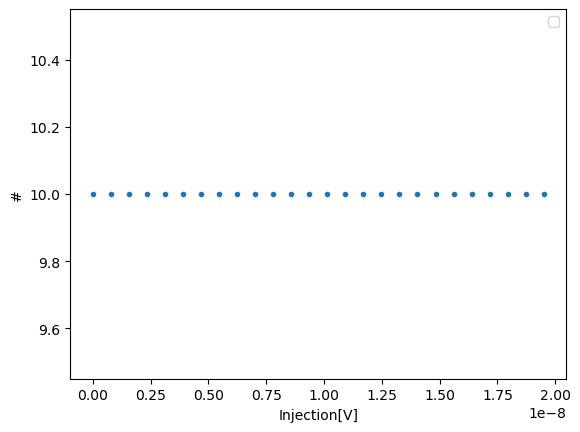

In [59]:
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]
    
dat0 = dat[dat['comp']==0]
uni, idx= np.unique(dat0['timestamp'], return_index=True)
dat0 = dat0[idx]
nhit = np.bincount(dat0['event_number']) #, minlength=len(param))
plt.plot(param['phase'], nhit, '.')

plt.xlabel('Injection[V]')
plt.ylabel('#')
plt.legend()

0 260
1 260
2 261
3 261
4 260
5 260
6 261
7 260
8 261
9 260
10 260
11 260


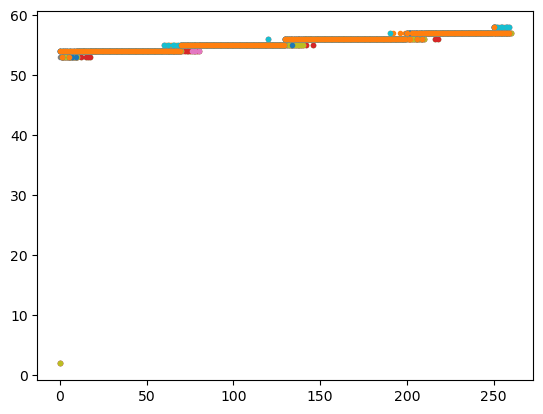

In [60]:
for comp in range(12):
    dat0 = dat[dat['comp']==comp]
    plt.plot(dat0['toa'], '.')
    print(comp, len(dat0))


5 260


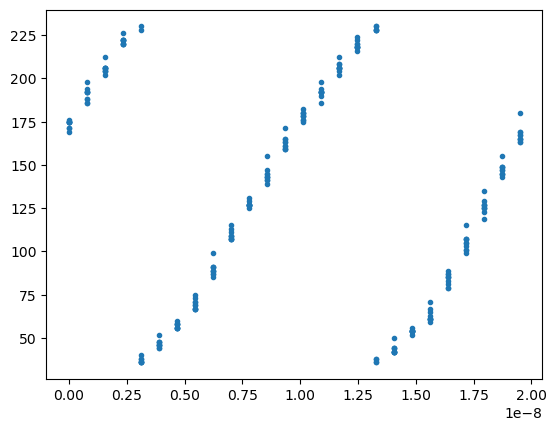

In [77]:
for comp in range(5,6):
    phase = param['phase'][dat[dat['comp']==comp]['event_number']]
    dat0 = dat[dat['comp']==comp]
    plt.plot(phase, dat0['tdc'], '.')
    print(comp, len(dat0))
uni, idx, cnt = np.unique(dat0['event_number'], return_index=True, return_counts=True)
ave = np.empty(len(uni))
std = np.empty(len(uni))
for i,u in enumerate(uni):
    ave[i]=np.average(dat0['tdc'][idx[i]:idx[i]+cnt[i]])
    std[i]=np.std(dat0['tdc'][idx[i]:idx[i]+cnt[i]])
ave_phase= phase[idx]

[ 2.28254244  3.6         2.4979992   1.74355958 76.81171786  2.22710575
  1.32664992  2.69072481  3.6         2.65329983  1.49666295  4.2142615
  3.55527777  2.1         2.82842712  2.4979992   2.22710575 93.90207665
  2.37486842  0.89442719  3.46410162  3.25576412  4.28952212  3.91918359
  3.2         4.69148164]
2.817956854386903
(21.940171242119003, -46.05777983799339, 0.502328082604536, 4.4271150851842735)


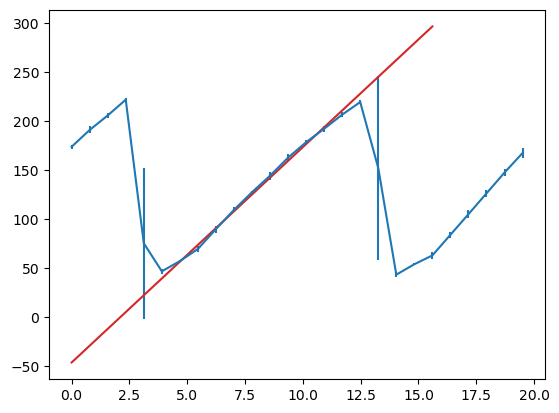

In [94]:
plt.errorbar(ave_phase*1E9, ave, yerr=std)
print(std)
print(np.average(std[std<10]))
fit = fitfunc.fit_line(ave_phase[7:16]*1E9, ave[7:16])
#plt.plot(ave_phase[7:16]*1E9, ave[7:16], 'o')
x = np.linspace(ave_phase[0]*1E9,ave_phase[20]*1E9,100)
plt.plot(x,fitfunc.line(x,*fit[:2]), 'C3')
print(fit)

In [92]:
1.6*4*32

204.8

Text(0.5, 1.0, 'Comparator1')

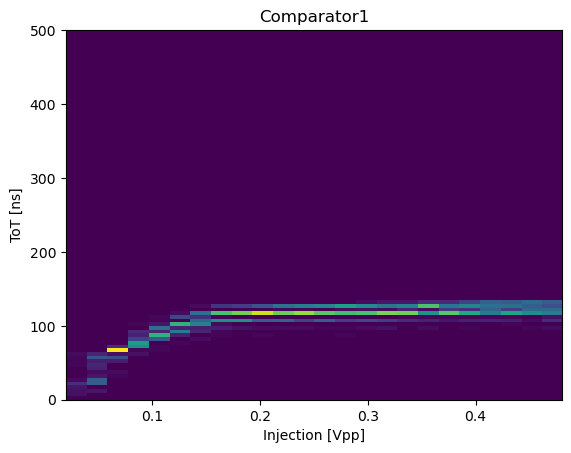

In [239]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
tot = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    tot[:,i] = np.bincount(ev['tot'], minlength=n)[:n]

plt.imshow(tot, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToT [ns]')
plt.title('Comparator1')
